# Deep learning in genomics - Basic model with PyTorch

This notebook is based on the [jupyter notebook](https://nbviewer.jupyter.org/github/abidlabs/deep-learning-genomics-primer/blob/master/A_Primer_on_Deep_Learning_in_Genomics_Public.ipynb) from the publication ["A primer on deep learning in genomics"](https://www.nature.com/articles/s41588-018-0295-5) but uses the [PyTorch](https://pytorch.org) library.

# Notebook setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
import pdb

In [5]:
# fastai version
__version__

'1.0.39.dev0'

# Data setup

## Load data from disk, generate dataframe, and save to disk

In [6]:
!pwd

/Users/MMP/Downloads/genomics


In [7]:
!ls /Volumes/HDD08/ugenomfit/data/*.fastq

/Volumes/HDD08/ugenomfit/data/SRR1993099.sra_1.fastq
/Volumes/HDD08/ugenomfit/data/SRR1993099.sra_2.fastq
/Volumes/HDD08/ugenomfit/data/SRR5665975.sra_1.fastq
/Volumes/HDD08/ugenomfit/data/SRR5665975.sra_2.fastq


In [8]:
PATH_raw_data = Path('/Volumes/HDD08/ugenomfit/data/'); PATH_raw_data

PosixPath('/Volumes/HDD08/ugenomfit/data')

In [9]:
from Bio import SeqIO

In [204]:
def get_seqs(path):
    label, seq, score = [], [], []
    for n, fn in enumerate((path).glob('*.fastq')):
        print(n)
        # print n, genome number = label, and fn = filename
        #print(n, re.findall('\d+', str(fn)), fn)
        
        # append sequences
        for m, record in enumerate(SeqIO.parse(fn, 'fastq')):
            
            print(m)
            if m == 500: break # only read in the first 100 sequences per fastq file
            
            # append sequences
            seq.append(str(record.seq))
            score.append(record.letter_annotations['phred_quality'])
            
            # print genome name including contig number and sequence length
            #print("%s %i" % (record.id, len(record)))
        
            # append genome labels
            label.append(str(record.id))
            #pdb.set_trace() # start debugger
            
        
        # break loop
        #if n == 1: break
    return label, seq, score

In [205]:
label, seq, score = get_seqs(PATH_raw_data)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [206]:
#label

['SRR1993099.sra.1',
 'SRR1993099.sra.2',
 'SRR1993099.sra.3',
 'SRR1993099.sra.4',
 'SRR1993099.sra.5',
 'SRR1993099.sra.6',
 'SRR1993099.sra.7',
 'SRR1993099.sra.8',
 'SRR1993099.sra.9',
 'SRR1993099.sra.10',
 'SRR1993099.sra.11',
 'SRR1993099.sra.12',
 'SRR1993099.sra.13',
 'SRR1993099.sra.14',
 'SRR1993099.sra.15',
 'SRR1993099.sra.16',
 'SRR1993099.sra.17',
 'SRR1993099.sra.18',
 'SRR1993099.sra.19',
 'SRR1993099.sra.20',
 'SRR1993099.sra.21',
 'SRR1993099.sra.22',
 'SRR1993099.sra.23',
 'SRR1993099.sra.24',
 'SRR1993099.sra.25',
 'SRR1993099.sra.26',
 'SRR1993099.sra.27',
 'SRR1993099.sra.28',
 'SRR1993099.sra.29',
 'SRR1993099.sra.30',
 'SRR1993099.sra.31',
 'SRR1993099.sra.32',
 'SRR1993099.sra.33',
 'SRR1993099.sra.34',
 'SRR1993099.sra.35',
 'SRR1993099.sra.36',
 'SRR1993099.sra.37',
 'SRR1993099.sra.38',
 'SRR1993099.sra.39',
 'SRR1993099.sra.40',
 'SRR1993099.sra.41',
 'SRR1993099.sra.42',
 'SRR1993099.sra.43',
 'SRR1993099.sra.44',
 'SRR1993099.sra.45',
 'SRR1993099.sra.46

In [207]:
#seq[-1][:100]

In [208]:
#seq

['ATCTACAAGAAGGGTGAAGTGCTTTTCGAATTTTGCCACTGCAAGTAATTGGTGCAATTGAAATACGAGCTTTCGTTCTCTAAGAGGATATAAAAATAAG',
 'TGTGCTCCATGTCGATATTTCGTGGAGCAAACCAAAAAAGATGCGGAACCTCTTAGCACTCCGCCTGGACATAGGCGGAGCATATTCCTCCTATAGGATG',
 'NACCCTTTATAAAAGCCTAGATGTAGCAGTGCGAAGCGAACTCGATACTTGCTCATCATTGATTTCGGCATCTTTGTATAGAAAACTACAAATGTCTGAC',
 'CGAATGGGACCTTGAATGGATTAACGAGATTCCCACTGTCCCTATCTACTATCTAGCGAAACCACAGCCAAGGGAACGGGCTTGGCAGAATCAGTGGGGA',
 'CACACCGCAGTAGATGGAAAACTCGAGTTTTACATGGAACAGGTAAATAAATTTCCTCCAATCTTGTACCAATGGTTTTTAGAAAACTTTCCTGATCCAA',
 'TAGGGGTTTCATCGTAGTTTATGTTACACCATTTCAGAATCTCGTAGATGTTTTCTTCTGCTCTTTTTATTAGCTTCTTCTGGTTTGTATCTTCTAAACG',
 'CCACGATGAGACTGTTCAGGTTAAACGTGGGCATCTTGCGATTCCATTGGTGAGCAGCGAAGGATTTGGTGGATTACTAGCTAATAGCAATCTATTTCAA',
 'AAGAACCACCGAAACATTAAAAGTGGGAATAATGTCGCATCAAATGGCGCCATGGATACCCATGTTTATTCAATCGTGCAAAAATAACACTGAACCGTTT',
 'CTTAAGTAACTAGTAGTATTACACTAGAAAGCTCCTCTTTCCACTGTCTCTTTCTCGCGTTTTATTCTTTTCCGTTTGAGACAAAAAAAGAGGAGCTTTC',
 'AAGCCAGTTATCCCTGTGGTAACTTTTCTGGCACCTCTAGCCTCAAATTCCGA

In [209]:
#score

[[31,
  31,
  31,
  35,
  35,
  35,
  35,
  35,
  39,
  32,
  39,
  39,
  35,
  39,
  30,
  37,
  36,
  37,
  38,
  19,
  37,
  27,
  34,
  39,
  39,
  40,
  33,
  39,
  40,
  24,
  35,
  37,
  36,
  34,
  30,
  38,
  39,
  30,
  24,
  35,
  18,
  27,
  35,
  33,
  37,
  24,
  30,
  33,
  38,
  19,
  9,
  18,
  30,
  37,
  39,
  9,
  14,
  29,
  37,
  37,
  39,
  36,
  8,
  28,
  13,
  22,
  26,
  20,
  26,
  6,
  20,
  30,
  26,
  36,
  33,
  33,
  31,
  17,
  28,
  29,
  29,
  32,
  31,
  21,
  7,
  20,
  11,
  11,
  26,
  20,
  26,
  26,
  20,
  29,
  34,
  29,
  31,
  34,
  25,
  31],
 [34,
  34,
  31,
  37,
  37,
  37,
  37,
  37,
  38,
  39,
  38,
  37,
  39,
  39,
  38,
  40,
  24,
  37,
  39,
  39,
  36,
  36,
  33,
  38,
  39,
  36,
  39,
  40,
  39,
  40,
  33,
  38,
  39,
  40,
  40,
  40,
  38,
  33,
  38,
  39,
  39,
  40,
  40,
  39,
  40,
  40,
  36,
  40,
  39,
  40,
  39,
  39,
  39,
  37,
  36,
  31,
  31,
  33,
  35,
  35,
  37,
  36,
  34,
  34,
  33,
  29,
  33,
  

In [210]:
len(label), len(seq), len(score)

(2000, 2000, 2000)

In [211]:
col_names = ['label', 'sequence', 'score']

In [212]:
fastq_df = pd.DataFrame({'label': label, 'sequence': seq, 'score': score})

In [213]:
fastq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
label       2000 non-null object
sequence    2000 non-null object
score       2000 non-null object
dtypes: object(3)
memory usage: 47.0+ KB


In [214]:
fastq_df.head()

,label,sequence,score
0,SRR1993099.sra.1,ATCTACAAGAAGGGTGAAGTGCTTTTCGAATTTTGCCACTGCAAGT...,"[31, 31, 31, 35, 35, 35, 35, 35, 39, 32, 39, 3..."
1,SRR1993099.sra.2,TGTGCTCCATGTCGATATTTCGTGGAGCAAACCAAAAAAGATGCGG...,"[34, 34, 31, 37, 37, 37, 37, 37, 38, 39, 38, 3..."
2,SRR1993099.sra.3,NACCCTTTATAAAAGCCTAGATGTAGCAGTGCGAAGCGAACTCGAT...,"[2, 16, 28, 35, 35, 37, 37, 37, 39, 38, 35, 38..."
3,SRR1993099.sra.4,CGAATGGGACCTTGAATGGATTAACGAGATTCCCACTGTCCCTATC...,"[31, 31, 31, 37, 37, 37, 37, 37, 37, 35, 39, 3..."
4,SRR1993099.sra.5,CACACCGCAGTAGATGGAAAACTCGAGTTTTACATGGAACAGGTAA...,"[34, 34, 34, 37, 37, 37, 37, 37, 39, 39, 39, 3..."


In [215]:
fastq_df.tail()

,label,sequence,score
1995,SRR5665975.sra.496,AGCTCCCTCGTTCGCTCTCCTGTTCCGACCCTGCCGCTTACCGGAT...,"[23, 33, 23, 31, 11, 26, 37, 34, 36, 31, 31, 1..."
1996,SRR5665975.sra.497,AGCAGGGCGGCATTCAGGTGCTGCTGGAAAAACTGCAAAGTGGCGG...,"[34, 34, 34, 34, 34, 38, 38, 38, 38, 38, 38, 3..."
1997,SRR5665975.sra.498,TTCTATACCATTAAAGAAGCCGAACGCGGCGTGGTAACACGCTTTG...,"[34, 34, 34, 34, 34, 38, 37, 38, 38, 38, 38, 3..."
1998,SRR5665975.sra.499,TACCGTGCCGTTAAAATCGGCTCCCACCAGCAGCTGAATCGCACCG...,"[34, 34, 34, 34, 34, 37, 34, 34, 35, 38, 38, 3..."
1999,SRR5665975.sra.500,TATATATGAGTAAACTTGGTCTGACAGTTACCAATGCTTAATCAGT...,"[34, 34, 34, 34, 34, 36, 38, 38, 38, 38, 36, 3..."


In [216]:
# save to H5 file (csv is making problems with the list in score column)
fastq_df.to_hdf('fastq_df.h5', key='df')

## Data frame setup

In [6]:
# load csv file into pandas data frame
fastq_df = pd.read_hdf('fastq_df.h5', key='df')# index_col=0)

In [7]:
# show pandas data frame head
fastq_df.head()

,label,sequence,score
0,SRR1993099.sra.1,ATCTACAAGAAGGGTGAAGTGCTTTTCGAATTTTGCCACTGCAAGT...,"[31, 31, 31, 35, 35, 35, 35, 35, 39, 32, 39, 3..."
1,SRR1993099.sra.2,TGTGCTCCATGTCGATATTTCGTGGAGCAAACCAAAAAAGATGCGG...,"[34, 34, 31, 37, 37, 37, 37, 37, 38, 39, 38, 3..."
2,SRR1993099.sra.3,NACCCTTTATAAAAGCCTAGATGTAGCAGTGCGAAGCGAACTCGAT...,"[2, 16, 28, 35, 35, 37, 37, 37, 39, 38, 35, 38..."
3,SRR1993099.sra.4,CGAATGGGACCTTGAATGGATTAACGAGATTCCCACTGTCCCTATC...,"[31, 31, 31, 37, 37, 37, 37, 37, 37, 35, 39, 3..."
4,SRR1993099.sra.5,CACACCGCAGTAGATGGAAAACTCGAGTTTTACATGGAACAGGTAA...,"[34, 34, 34, 37, 37, 37, 37, 37, 39, 39, 39, 3..."


In [8]:
fastq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 3 columns):
label       2000 non-null object
sequence    2000 non-null object
score       2000 non-null object
dtypes: object(3)
memory usage: 62.5+ KB


### Target variables setup

In [220]:
#target_labels = ['SRR1993099', 'SRR5665975']

In [9]:
def recode_label(label):

    if label.find('SRR1993099') != -1:
        return 0
       
    elif label.find('SRR5665975') != -1:
        return 1
    
    else:
        return np.nan

In [10]:
fastq_df['label_recoded'] = fastq_df['label'].apply(recode_label)

In [11]:
fastq_df.head()

,label,sequence,score,label_recoded
0,SRR1993099.sra.1,ATCTACAAGAAGGGTGAAGTGCTTTTCGAATTTTGCCACTGCAAGT...,"[31, 31, 31, 35, 35, 35, 35, 35, 39, 32, 39, 3...",0
1,SRR1993099.sra.2,TGTGCTCCATGTCGATATTTCGTGGAGCAAACCAAAAAAGATGCGG...,"[34, 34, 31, 37, 37, 37, 37, 37, 38, 39, 38, 3...",0
2,SRR1993099.sra.3,NACCCTTTATAAAAGCCTAGATGTAGCAGTGCGAAGCGAACTCGAT...,"[2, 16, 28, 35, 35, 37, 37, 37, 39, 38, 35, 38...",0
3,SRR1993099.sra.4,CGAATGGGACCTTGAATGGATTAACGAGATTCCCACTGTCCCTATC...,"[31, 31, 31, 37, 37, 37, 37, 37, 37, 35, 39, 3...",0
4,SRR1993099.sra.5,CACACCGCAGTAGATGGAAAACTCGAGTTTTACATGGAACAGGTAA...,"[34, 34, 34, 37, 37, 37, 37, 37, 39, 39, 39, 3...",0


In [12]:
fastq_df.tail()

,label,sequence,score,label_recoded
1995,SRR5665975.sra.496,AGCTCCCTCGTTCGCTCTCCTGTTCCGACCCTGCCGCTTACCGGAT...,"[23, 33, 23, 31, 11, 26, 37, 34, 36, 31, 31, 1...",1
1996,SRR5665975.sra.497,AGCAGGGCGGCATTCAGGTGCTGCTGGAAAAACTGCAAAGTGGCGG...,"[34, 34, 34, 34, 34, 38, 38, 38, 38, 38, 38, 3...",1
1997,SRR5665975.sra.498,TTCTATACCATTAAAGAAGCCGAACGCGGCGTGGTAACACGCTTTG...,"[34, 34, 34, 34, 34, 38, 37, 38, 38, 38, 38, 3...",1
1998,SRR5665975.sra.499,TACCGTGCCGTTAAAATCGGCTCCCACCAGCAGCTGAATCGCACCG...,"[34, 34, 34, 34, 34, 37, 34, 34, 35, 38, 38, 3...",1
1999,SRR5665975.sra.500,TATATATGAGTAAACTTGGTCTGACAGTTACCAATGCTTAATCAGT...,"[34, 34, 34, 34, 34, 36, 38, 38, 38, 38, 36, 3...",1


In [13]:
fastq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 4 columns):
label            2000 non-null object
sequence         2000 non-null object
score            2000 non-null object
label_recoded    2000 non-null int64
dtypes: int64(1), object(3)
memory usage: 78.1+ KB


In [14]:
# setup target a
targA = fastq_df['label_recoded'].values; targA

array([0, 0, 0, 0, ..., 1, 1, 1, 1])

In [15]:
# setup target b = not(target a)
targB = np.logical_not(fastq_df['label_recoded'].values).astype(int); targB

array([1, 1, 1, 1, ..., 0, 0, 0, 0])

In [16]:
# zip together target a and target b to get target
targ = [[a,b] for a, b in zip(targA, targB)]; targ[:4], '...', targ[-4:]#, len(targ)

([[0, 1], [0, 1], [0, 1], [0, 1]], '...', [[1, 0], [1, 0], [1, 0], [1, 0]])

## Dataset setup for training with basic PyTorch

### Setup sqeuence to array function

#### 3D encoding of fastq sequence

In [64]:
# open sequence array function
def open_fastq_array(seq:str, score:list, seq_len=None)->np.array:
    "Return `List` object with np.array created from sequence string `seq`."
    
    if seq_len != None:
        seq = seq[:seq_len]
        score = score[:seq_len]
    
    int_enc = LabelEncoder() # setup class instance to encode the four different bases to integer values (1D)
    #one_hot_enc = OneHotEncoder(categories=[range(4)]) # setup one hot encoder to encode integer encoded classes (1D) to one hot encoded array (4D)
    
    enc = int_enc.fit_transform(list(seq)) # bases (ACGT) to int (0,1,2,3)
    enc = np.array(enc).reshape(-1,1) # reshape to get rank 2 array (from rank 1 array)
    #enc = one_hot_enc.fit_transform(enc) # encoded integer encoded bases to sparse matrix (sparse matrix dtype)
    #enc = enc.toarray().T#.reshape(1,-1,4) # export sparse matrix to np array
    
    # one-hot-encode base position
    adenosine = enc == 0
    thymine = enc == 3
    cytosine = enc == 1
    
    # base pair encoding: AT = False, GC = True
    # https://stackoverflow.com/questions/32192163/python-and-operator-on-two-boolean-lists-how
    basepair_enc = np.array([not(a or t) for a, t in zip(adenosine, thymine)]).astype('int')*255
    
    # strandpostion encodes the position of A/C or T/G on the the strand: A or C = False, T or G = True
    strandposition_enc = np.array([not(a or c) for a, c in zip(adenosine, cytosine)]).astype('int')*255
    
    score_enc = np.array(score)
    
    enc = np.stack((basepair_enc, strandposition_enc, score_enc), axis=0)
    
    return enc

In [65]:
seq_len = 50 # None !
n = 750
test_fastq_arr = open_fastq_array(fastq_df.sequence[n], np.multiply(fastq_df.score[n],1), seq_len); test_fastq_arr, test_fastq_arr.shape

(array([[255,   0,   0,   0, ..., 255,   0,   0, 255],
        [255,   0, 255,   0, ..., 255, 255,   0, 255],
        [ 31,  33,  31,  35, ...,  31,  26,  23,   8]]), (3, 50))

In [66]:
print(fastq_df.sequence[n])
print('\n')
print(fastq_df.score[n])

GATACTGAAGTGGCAATTCACTTTGTTCTTAGCGTCTATGGCCGGTGTAGGTGCATTTACCTTCTACGAACTTTATTTCACTTCAGATTATGTCAAGGGC


[31, 33, 31, 35, 37, 37, 35, 37, 39, 39, 30, 35, 37, 39, 41, 40, 41, 41, 41, 40, 40, 40, 41, 37, 40, 39, 39, 40, 41, 41, 41, 40, 40, 40, 40, 41, 41, 41, 40, 41, 40, 38, 40, 41, 40, 15, 31, 26, 23, 8, 28, 14, 31, 37, 36, 32, 39, 38, 38, 35, 38, 39, 41, 40, 39, 36, 36, 39, 27, 30, 35, 33, 31, 34, 34, 34, 25, 34, 32, 32, 34, 34, 34, 34, 32, 34, 29, 34, 34, 34, 34, 34, 31, 34, 34, 32, 31, 34, 35, 30]


In [67]:
# https://stackoverflow.com/questions/11352047/finding-moving-average-from-data-points-in-python
# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean/27681394#27681394
data = fastq_df.score[n]
window_width = 10
cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width

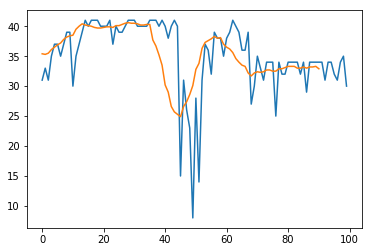

In [68]:
plt.plot(data)
plt.plot(ma_vec)

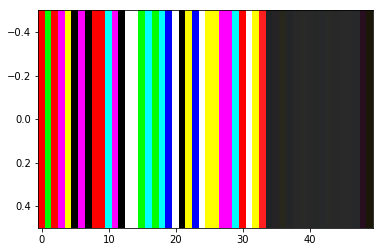

In [69]:
# visualize opened sequence as 2D image
plt.imshow(test_fastq_arr.reshape(1,-1,3), aspect='auto')
#plt.axis('off');

In [70]:
# show channels separately

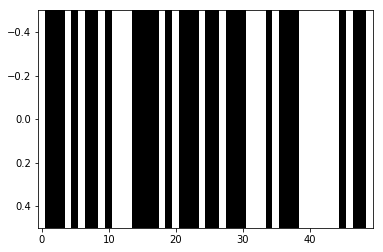

In [71]:
plt.imshow(test_fastq_arr[0,:].reshape(1,-1), aspect='auto', cmap='gray')

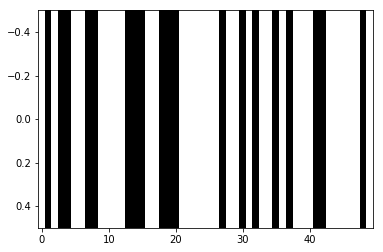

In [72]:
plt.imshow(test_fastq_arr[1,:].reshape(1,-1), aspect='auto', cmap='gray')

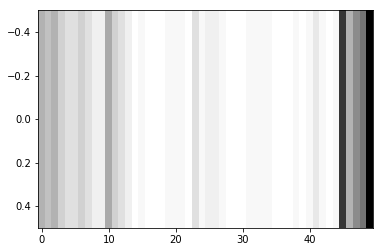

In [73]:
plt.imshow(test_fastq_arr[2,:].reshape(1,-1), aspect='auto', cmap='gray')

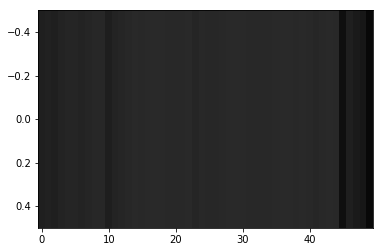

In [74]:
# show score with 3 channels (copied 3x)
plt.imshow(np.concatenate(([test_fastq_arr[2,:].reshape(-1,1), test_fastq_arr[2,:].reshape(-1,1), test_fastq_arr[2,:].reshape(-1,1)]), axis=1).reshape(1,-1,3), aspect='auto')

### Setup datasets

In [189]:
#next(iter(zip(fastq_df['sequence'].values, fastq_df['score'].values)))

In [172]:
# generate sequence array float tensor for every sequence in pandas data frame column Sequences (x data)
seq_len = 100
x = [tensor(open_fastq_array(seq, score, seq_len)).type(torch.float) for seq, score in zip(fastq_df['sequence'].values, fastq_df['score'].values)]; len(x)

2000

In [173]:
# stack all tensors together in a single tensor
x = torch.stack(x); x.shape
#x = torch.stack(x).view((-1,4,50,1)); x.shape # --> torch.Size([2000, 4, 50, 1])

torch.Size([2000, 3, 100])

In [174]:
# setup target data floar tensor (y data)
y = tensor(targ).view(-1,2).type(torch.float); y # multi-label
#y = tensor(targA).type(torch.float); y # classification with single label

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])

In [175]:
# verify total dataset length
len(x), len(y)

(2000, 2000)

In [176]:
# check x and y data
i = 2
x[i], y[i]

(tensor([[  0.,   0., 255., 255., 255., 255., 255., 255.,   0., 255.,   0.,   0.,
            0.,   0., 255., 255., 255., 255.,   0., 255.,   0., 255., 255., 255.,
            0., 255., 255.,   0., 255., 255., 255., 255., 255.,   0.,   0., 255.,
          255., 255.,   0.,   0., 255., 255., 255., 255.,   0., 255.,   0., 255.,
          255., 255., 255., 255., 255., 255.,   0., 255., 255.,   0., 255., 255.,
          255.,   0., 255., 255., 255., 255., 255., 255., 255.,   0., 255., 255.,
          255., 255., 255., 255., 255.,   0., 255.,   0., 255.,   0.,   0.,   0.,
            0., 255., 255.,   0., 255.,   0.,   0.,   0., 255., 255., 255., 255.,
          255., 255.,   0., 255.],
         [255.,   0.,   0.,   0.,   0., 255., 255., 255.,   0., 255.,   0.,   0.,
            0.,   0., 255.,   0.,   0., 255.,   0., 255.,   0., 255., 255., 255.,
            0., 255.,   0.,   0., 255., 255., 255.,   0., 255.,   0.,   0., 255.,
            0., 255.,   0.,   0.,   0., 255.,   0., 255.,   0.,

In [177]:
# split dataset into train and valid TensorDataset for NN training
#train_ds = TensorDataset(x[:1500],y[:1500])
#valid_ds = TensorDataset(x[-500:],y[-500:])

In [178]:
# split dataset into train and valid TensorDataset for NN training
train_ds = TensorDataset(x[250:1750],y[250:1750])
valid_ds = TensorDataset(torch.cat((x[:250], x[-250:])), torch.cat((y[:250], y[-250:])))

In [179]:
# verify train and valid dataset length
len(train_ds), len(valid_ds)

(1500, 500)

In [180]:
# check the number of classes in the y target
torch.cat((y[:250], y[-250:])).sum(dim=0)

tensor([250., 250.])

# Model setup

## Basic model for PyTorch training

### Conv calculations

http://cs231n.github.io/convolutional-networks/<br>
"We can compute the spatial size of the output volume as a function of the input volume size (W), the receptive field size of the Conv Layer neurons (F), the stride with which they are applied (S), and the amount of zero padding used (P) on the border. You can convince yourself that the correct formula for calculating how many neurons “fit” is given by (W−F+2P)/S+1. For example for a 7x7 input and a 3x3 filter with stride 1 and pad 0 we would get a 5x5 output. With stride 2 we would get a 3x3 output. "

In [377]:
((7-3+2*0)/1)+1

5.0

In [389]:
((50-12+2*0)/1)+1

39.0

In [369]:
((39-4+2*0)/1)+1

36.0

In [380]:
(39+2*0-1*(4-1)-1)/1+1

36.0

In [379]:
288/32

9.0

In [392]:
nn.Conv1d(in_channels=3, out_channels=32, kernel_size=12)(torch.rand((1,3,100))).shape

torch.Size([1, 32, 89])

In [393]:
nn.MaxPool1d(kernel_size=4)(torch.rand((1,32,89))).shape

torch.Size([1, 32, 22])

In [394]:
32*22

704

### Model setup

In [181]:
# set dropout
drop_p = 0.2

In [85]:
# inplace=True seems to generate problems?

In [158]:
net_basic = nn.Sequential(nn.Conv1d(in_channels=3, out_channels=32, kernel_size=12),
                    nn.MaxPool1d(kernel_size=4),
                    Flatten(),
                    nn.Dropout(drop_p),
                    nn.Linear(in_features=288, out_features=16),
                    nn.ReLU(),
                    nn.Dropout(drop_p),
                    nn.Linear(in_features=16, out_features=2),
                    #Debugger() # optional debugger layer
                   )

In [182]:
net_basic = nn.Sequential(nn.Conv1d(in_channels=3, out_channels=32, kernel_size=12), # channels set to 3 !!!
                    nn.MaxPool1d(kernel_size=4),
                    Flatten(),
                    nn.Dropout(drop_p),
                    nn.Linear(in_features=704, out_features=512), # seq len 50bp --> 288, 100 bp --> 704
                    nn.ReLU(),
                    nn.Dropout(drop_p),
                    nn.Linear(512, 256),
                    nn.ReLU(),
                    nn.Dropout(drop_p),
                    nn.Linear(256, 16),
                    nn.ReLU(),
                    nn.Dropout(drop_p),
                    nn.Linear(in_features=16, out_features=2),
                    #Debugger() # optional debugger layer
                   )

In [183]:
# check network architecture
net_basic

Sequential(
  (0): Conv1d(3, 32, kernel_size=(12,), stride=(1,))
  (1): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (2): Lambda()
  (3): Dropout(p=0.2)
  (4): Linear(in_features=704, out_features=512, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2)
  (7): Linear(in_features=512, out_features=256, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.2)
  (10): Linear(in_features=256, out_features=16, bias=True)
  (11): ReLU()
  (12): Dropout(p=0.2)
  (13): Linear(in_features=16, out_features=2, bias=True)
)

In [145]:
# initialize weights with kaiming normal initialization
apply_init(net_basic, nn.init.kaiming_normal_)

# Model training

## Train basic model with PyTorch

In [184]:
# set batch size
bs = 64

In [185]:
# setup DataLoader for NN training from TensorDatasets for NN training
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=bs*2, shuffle=False)

In [186]:
# set optimizer type, parameters, and hyperparameters
opt = optim.SGD(net_basic.parameters(), lr=1e-3, momentum=0.9)

In [187]:
# training loop extended from https://github.com/fastai/fastai_docs/blob/master/dev_nb/mnist_sample.py


# simple loss function for batch
def simple_loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)


# simple fit function
def simple_fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    
    epoch_list = []
    train_loss_list = []
    valid_loss_list = []
    acc_list = []
    y_hat_list = []
    y_true_list = []
    
    print('epoch\ttrain loss\tvalid loss\taccuaracy')
    
    for epoch in range(epochs):
        
        model.train()
        train_losses, train_nums = zip(*[simple_loss_batch(model, loss_func, xb, yb, opt) for xb, yb in train_dl])
        
        # loss calculation for every epoch
        train_loss = np.sum(np.multiply(train_losses, train_nums)) / np.sum(train_nums)
        train_loss_list.append(train_loss)
        
        model.eval()
        with torch.no_grad():
            valid_losses, valid_nums = zip(*[simple_loss_batch(model, loss_func, xb, yb)
                                for xb,yb in valid_dl])
            
            # calculations for accuracy_thres metric:          
            y_hat = [model(xb) for xb, _ in valid_dl]
            y_true = [yb for _, yb in valid_dl]
            
            y_hat_list.append(torch.cat(y_hat).cpu().numpy())
            y_true_list.append(torch.cat(y_true).cpu().numpy())
            
            
        valid_loss = np.sum(np.multiply(valid_losses, valid_nums)) / np.sum(valid_nums)
        acc = accuracy_thresh(torch.cat(y_hat), torch.cat(y_true))
        
        epoch_list.append(epoch)
        valid_loss_list.append(valid_loss)
        acc_list.append(acc.item())
        
        print(f'{epoch}\t{train_loss:.6f}\t{valid_loss:.6f}\t{acc.detach().item():.3f}')
    
    # print training (https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)
    #pdb.set_trace()
    plt.subplot(2,1,1)
    plt.title('Training')
    plt.ylabel('Loss')
    plt.plot(train_loss_list, label='Train loss')
    plt.plot(valid_loss_list, label='Valid loss')
    plt.legend(loc=1)
    
    plt.subplot(2,1,2)
    plt.xlabel('Training batch')
    plt.ylabel('Accuracy')
    plt.plot(acc_list, label='Accuracy metric')
    plt.legend(loc=1)
    
    plt.show()
    
    #pdb.set_trace()
    
    return epoch_list, train_loss_list, valid_loss_list, acc_list, y_hat_list, y_true_list

epoch	train loss	valid loss	accuaracy
0	0.780919	0.694790	0.500
1	0.695077	0.694694	0.500
2	0.694753	0.694590	0.500
3	0.694541	0.694521	0.500
4	0.694882	0.694449	0.500
5	0.695040	0.694377	0.500
6	0.694586	0.694303	0.500
7	0.694359	0.694250	0.500
8	0.694369	0.694204	0.500
9	0.694429	0.694138	0.500
10	0.693989	0.694088	0.500
11	0.694541	0.694014	0.500
12	0.693953	0.693970	0.500
13	0.694119	0.693913	0.500
14	0.693979	0.693869	0.500
15	0.693836	0.693835	0.500
16	0.693700	0.693804	0.500
17	0.693816	0.693757	0.500
18	0.693866	0.693716	0.500
19	0.693779	0.693699	0.500
20	0.693712	0.693653	0.500
21	0.693665	0.693634	0.500
22	0.693683	0.693602	0.500
23	0.693484	0.693570	0.500
24	0.693628	0.693542	0.500
25	0.693434	0.693530	0.500
26	0.693644	0.693509	0.500
27	0.693349	0.693485	0.500
28	0.693541	0.693460	0.500
29	0.693414	0.693446	0.500
30	0.693491	0.693425	0.500
31	0.693403	0.693415	0.500
32	0.693125	0.693397	0.500
33	0.693358	0.693386	0.500
34	0.693328	0.693371	0.500
35	0.693290	0.693359	0.500


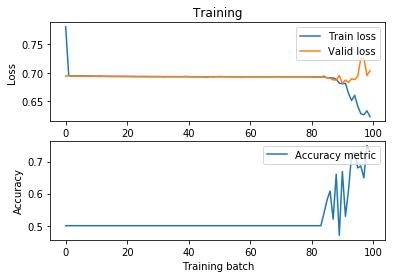

In [188]:
epoch_list, train_loss_list, valid_loss_list, acc_list, y_hat_list, y_true_list = \
simple_fit(100, net_basic, F.binary_cross_entropy_with_logits, opt, train_dl, valid_dl)

epoch	train loss	valid loss	accuaracy
0	0.600008	0.698840	0.730
1	0.600969	0.692987	0.754
2	0.591435	0.694584	0.740
3	0.590053	0.726944	0.745
4	0.580916	0.710283	0.761
5	0.578672	0.691073	0.766
6	0.550475	0.783644	0.759
7	0.551840	0.728513	0.725
8	0.511100	0.645424	0.742
9	0.477625	0.601255	0.758
10	0.456785	0.645737	0.756
11	0.442627	0.645925	0.762
12	0.420643	0.681195	0.752
13	0.414291	0.653433	0.771
14	0.390119	0.661066	0.759
15	0.398398	0.662051	0.762
16	0.390466	0.648082	0.756
17	0.379322	0.663783	0.759
18	0.358088	0.672894	0.764
19	0.354025	0.589842	0.761
20	0.328923	0.669425	0.749
21	0.321054	0.649121	0.755
22	0.311118	0.712536	0.738
23	0.301067	0.652746	0.765
24	0.285428	0.629220	0.767
25	0.260498	0.682674	0.756
26	0.276493	0.574018	0.778
27	0.253138	0.694934	0.772
28	0.247854	0.610086	0.771
29	0.222541	0.645830	0.774
30	0.209061	0.650343	0.773
31	0.200769	0.687456	0.785
32	0.179572	0.709553	0.769
33	0.180749	0.774029	0.745
34	0.192882	0.725102	0.764
35	0.178563	0.729063	0.765


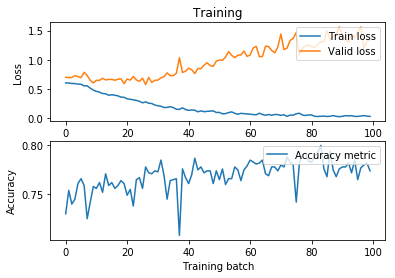

In [189]:
epoch_list, train_loss_list, valid_loss_list, acc_list, y_hat_list, y_true_list = \
simple_fit(100, net_basic, F.binary_cross_entropy_with_logits, opt, train_dl, valid_dl)

epoch	train loss	valid loss	accuaracy
0	1.371970	0.696539	0.500
1	0.696707	0.696480	0.500
2	0.697074	0.696417	0.500
3	0.695681	0.696226	0.500
4	0.695758	0.695596	0.501
5	0.693720	0.695053	0.502
6	0.694791	0.690298	0.516
7	0.688263	0.675530	0.544
8	0.674950	0.666396	0.560
9	0.670432	0.659084	0.579
10	0.677925	0.655983	0.571
11	0.656405	0.650133	0.586
12	0.638581	0.645817	0.591
13	0.655663	0.648113	0.588
14	0.644254	0.636351	0.595
15	0.630278	0.639689	0.593
16	0.619500	0.635785	0.596
17	0.606352	0.630704	0.598
18	0.598676	0.624586	0.604
19	0.592306	0.626076	0.702
20	0.573242	0.634095	0.717
21	0.568907	0.620779	0.719
22	0.565677	0.622736	0.727
23	0.587092	0.604220	0.725
24	0.560995	0.602932	0.713
25	0.572560	0.618692	0.690
26	0.574700	0.641713	0.716
27	0.566129	0.612188	0.709
28	0.543026	0.638103	0.718
29	0.551711	0.609380	0.735
30	0.532072	0.618821	0.719
31	0.521952	0.598805	0.731
32	0.528623	0.596957	0.740
33	0.538127	0.597971	0.750
34	0.525686	0.624572	0.749
35	0.523117	0.610410	0.746


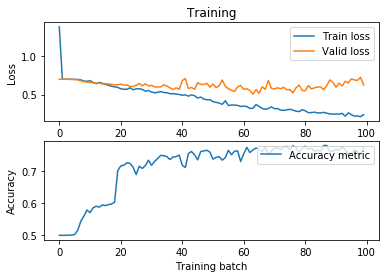

In [107]:
epoch_list, train_loss_list, valid_loss_list, acc_list, y_hat_list, y_true_list = \
simple_fit(100, net_basic, F.binary_cross_entropy_with_logits, opt, train_dl, valid_dl)

epoch	train loss	valid loss	accuaracy
0	0.216348	0.684399	0.766
1	0.214148	0.780591	0.755
2	0.233074	0.634734	0.771
3	0.223743	0.690003	0.766
4	0.227522	0.601474	0.778
5	0.216772	0.693779	0.767
6	0.218201	0.681947	0.763
7	0.199582	0.817458	0.762
8	0.270362	0.652816	0.760
9	0.225765	0.819393	0.755
10	0.202536	0.675082	0.771
11	0.204886	0.683528	0.780
12	0.205164	0.869777	0.763
13	0.225056	0.698949	0.763
14	0.174989	0.765749	0.773
15	0.189225	0.791751	0.759
16	0.191614	0.727832	0.758
17	0.188925	0.736573	0.773
18	0.178455	0.886250	0.752
19	0.183793	0.757790	0.758
20	0.173414	0.802219	0.773
21	0.211710	0.697210	0.778
22	0.194022	0.757287	0.769
23	0.170647	0.741635	0.771
24	0.196875	0.801613	0.757
25	0.173278	0.680422	0.777
26	0.183077	0.864776	0.755
27	0.165920	0.891677	0.761
28	0.175842	0.835035	0.745
29	0.182299	0.762516	0.767
30	0.180793	0.743516	0.768
31	0.177585	0.739329	0.784
32	0.178142	0.735882	0.782
33	0.188328	0.825272	0.764
34	0.181405	0.775198	0.768
35	0.166595	1.200736	0.758


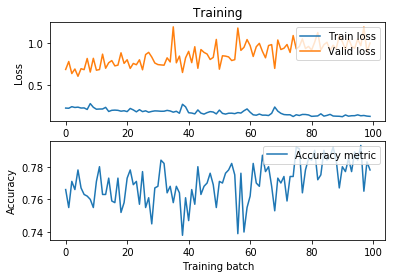

In [108]:
epoch_list, train_loss_list, valid_loss_list, acc_list, y_hat_list, y_true_list = \
simple_fit(100, net_basic, F.binary_cross_entropy_with_logits, opt, train_dl, valid_dl)